In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor,AdaBoostRegressor
from sklearn.linear_model import LinearRegression,LassoCV,Lasso
from sklearn.neighbors import KNeighborsRegressor

from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.preprocessing import LabelEncoder,PowerTransformer,StandardScaler
from scipy.stats import zscore
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_excel("Flight_scrapped_data.xlsx")
df

,Unnamed: 0,AirlineName,Date,Source,Destination,DepartureTime,ArrivalTime,Duration,Total_Stops,Price
0,0,SpiceJet,6 Apr 2022,New Delhi,Mumbai,07:20,09:35,2h 15m,Non,7318
1,1,SpiceJet,6 Apr 2022,New Delhi,Mumbai,18:55,21:10,2h 15m,Non,7318
2,2,SpiceJet,6 Apr 2022,New Delhi,Mumbai,19:45,22:00,2h 15m,Non,7318
3,3,SpiceJet,6 Apr 2022,New Delhi,Mumbai,06:20,08:45,2h 25m,Non,7318
4,4,SpiceJet,6 Apr 2022,New Delhi,Mumbai,05:45,17:50,12h 05m,1,7318
...,...,...,...,...,...,...,...,...,...,...
1887,2550,Air India,22 Apr 2022,Patna,Bangalore,16:00,07:50,15h 50m,2,14232
1888,2551,Air India,22 Apr 2022,Patna,Bangalore,16:00,11:10,19h 10m,2,14232
1889,2552,Vistara,22 Apr 2022,Patna,Bangalore,10:00,19:15,9h 15m,2,15387
1890,2554,Vistara,22 Apr 2022,Patna,Bangalore,10:00,20:55,10h 55m,2,15387


In [3]:
df.drop("Unnamed: 0",axis=1,inplace=True)

In [4]:
df.head()

,AirlineName,Date,Source,Destination,DepartureTime,ArrivalTime,Duration,Total_Stops,Price
0,SpiceJet,6 Apr 2022,New Delhi,Mumbai,07:20,09:35,2h 15m,Non,7318
1,SpiceJet,6 Apr 2022,New Delhi,Mumbai,18:55,21:10,2h 15m,Non,7318
2,SpiceJet,6 Apr 2022,New Delhi,Mumbai,19:45,22:00,2h 15m,Non,7318
3,SpiceJet,6 Apr 2022,New Delhi,Mumbai,06:20,08:45,2h 25m,Non,7318
4,SpiceJet,6 Apr 2022,New Delhi,Mumbai,05:45,17:50,12h 05m,1,7318


In [5]:
df['Total_Stops']=df['Total_Stops'].replace("Non",0)

In [6]:
df['Total_Stops']=df['Total_Stops'].astype(int)
df['Price']=df['Price'].astype(int)

In [7]:
df['Duration']=pd.to_timedelta(df.Duration)
df['Duration_hours']=df.Duration.dt.total_seconds()//3600

In [8]:
df['Date']=pd.to_datetime(df.Date, format="%d %b %Y")

In [9]:
df.head()

,AirlineName,Date,Source,Destination,DepartureTime,ArrivalTime,Duration,Total_Stops,Price,Duration_hours
0,SpiceJet,2022-04-06,New Delhi,Mumbai,07:20,09:35,0 days 02:15:00,0,7318,2.0
1,SpiceJet,2022-04-06,New Delhi,Mumbai,18:55,21:10,0 days 02:15:00,0,7318,2.0
2,SpiceJet,2022-04-06,New Delhi,Mumbai,19:45,22:00,0 days 02:15:00,0,7318,2.0
3,SpiceJet,2022-04-06,New Delhi,Mumbai,06:20,08:45,0 days 02:25:00,0,7318,2.0
4,SpiceJet,2022-04-06,New Delhi,Mumbai,05:45,17:50,0 days 12:05:00,1,7318,12.0


In [10]:
## Transforming New columns for DateOfJourney,Dep_time,Arrival_Time,Duration

df['Journey_day']= df["Date"].dt.day
#Two new features transformed through DataOfJourney


df["Dep_hour"]= pd.to_datetime(df['DepartureTime']).dt.hour


#Two new features transformed through Dep_Time.


df["Arr_hour"]= pd.to_datetime(df['ArrivalTime']).dt.hour

#Two new features transformed through Arrival_Time as tihis column is also transformed.


df.head(2)

,AirlineName,Date,Source,Destination,DepartureTime,ArrivalTime,Duration,Total_Stops,Price,Duration_hours,Journey_day,Dep_hour,Arr_hour
0,SpiceJet,2022-04-06,New Delhi,Mumbai,07:20,09:35,0 days 02:15:00,0,7318,2.0,6,7,9
1,SpiceJet,2022-04-06,New Delhi,Mumbai,18:55,21:10,0 days 02:15:00,0,7318,2.0,6,18,21


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1892 entries, 0 to 1891
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype          
---  ------          --------------  -----          
 0   AirlineName     1892 non-null   object         
 1   Date            1892 non-null   datetime64[ns] 
 2   Source          1892 non-null   object         
 3   Destination     1892 non-null   object         
 4   DepartureTime   1892 non-null   object         
 5   ArrivalTime     1892 non-null   object         
 6   Duration        1892 non-null   timedelta64[ns]
 7   Total_Stops     1892 non-null   int64          
 8   Price           1892 non-null   int64          
 9   Duration_hours  1892 non-null   float64        
 10  Journey_day     1892 non-null   int64          
 11  Dep_hour        1892 non-null   int64          
 12  Arr_hour        1892 non-null   int64          
dtypes: datetime64[ns](1), float64(1), int64(5), object(5), timedelta64[ns](1)
memory usage: 192.3

In [12]:
df.shape

(1892, 13)

In [13]:
df.isna().sum()

AirlineName       0
Date              0
Source            0
Destination       0
DepartureTime     0
ArrivalTime       0
Duration          0
Total_Stops       0
Price             0
Duration_hours    0
Journey_day       0
Dep_hour          0
Arr_hour          0
dtype: int64

In [14]:
df.columns

Index(['AirlineName', 'Date', 'Source', 'Destination', 'DepartureTime',
       'ArrivalTime', 'Duration', 'Total_Stops', 'Price', 'Duration_hours',
       'Journey_day', 'Dep_hour', 'Arr_hour'],
      dtype='object')

AirlineName: The name of the airline.

Date: The date of the journey

Source: The source from which the service begins.

Destination: The destination where the service ends.

DepartureTime: The time when the journey starts from the source.

ArrivalTime: Time of arrival at the destination.

Duration: Total duration of the flight.

Total_Stops: Total stops between the source and destination.

Price: The price of the ticket

In [15]:
df.describe()

,Duration,Total_Stops,Price,Duration_hours,Journey_day,Dep_hour,Arr_hour
count,1892,1892.000000,1892.000000,1892.000000,1892.000000,1892.000000,1892.000000
mean,0 days 09:56:06.437632135,0.949260,8972.396406,9.485201,17.671776,12.822410,13.529598
std,0 days 08:14:59.390414696,0.728337,3739.265532,8.246038,5.489434,5.778584,6.503115
min,0 days 01:00:00,0.000000,3601.000000,1.000000,6.000000,0.000000,0.000000
25%,0 days 02:50:00,0.000000,6291.000000,2.000000,15.000000,7.000000,9.000000
50%,0 days 07:20:00,1.000000,7986.000000,7.000000,18.000000,13.000000,14.000000
75%,0 days 14:15:00,1.000000,10721.000000,14.000000,22.000000,18.000000,19.000000
max,1 days 17:30:00,3.000000,26411.000000,41.000000,28.000000,23.000000,23.000000


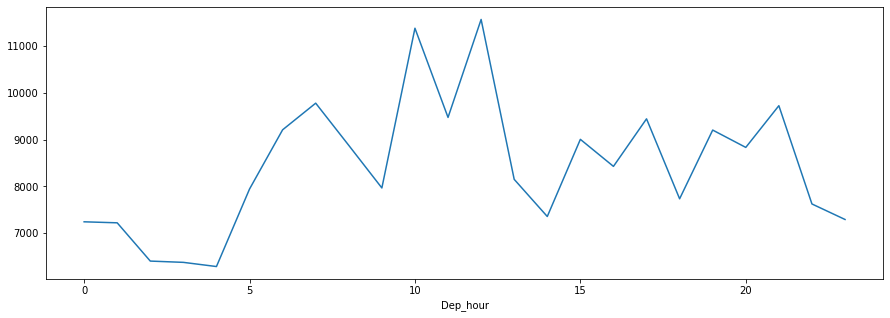

In [16]:
plt.figure(figsize=(15,5))
df.groupby("Dep_hour")['Price'].mean().plot(kind='line')
plt.show()

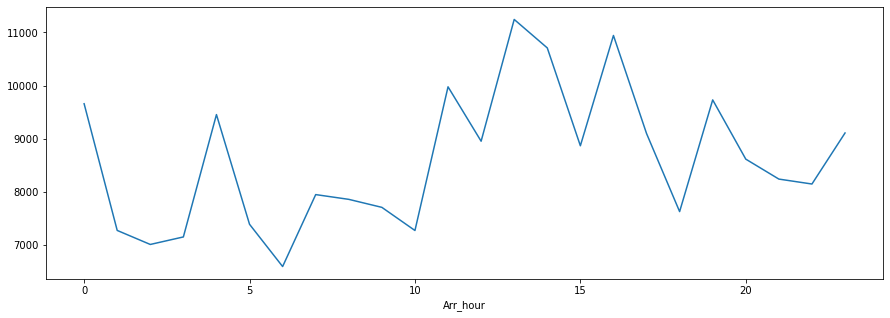

In [17]:
plt.figure(figsize=(15,5))
df.groupby("Arr_hour")['Price'].mean().plot(kind='line')
plt.show()

<AxesSubplot:xlabel='Price', ylabel='AirlineName'>

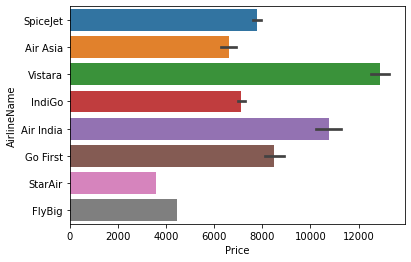

In [18]:
sns.barplot(df['Price'],df['AirlineName'])

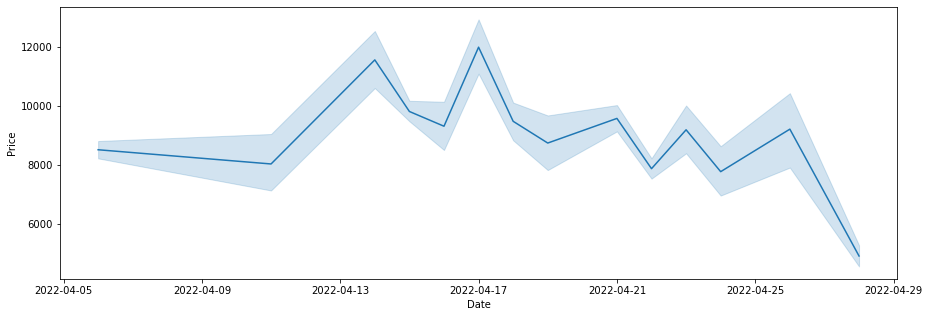

In [19]:
plt.figure(figsize=(15,5))
sns.lineplot(x=df['Date'],y=df['Price'])
plt.show()

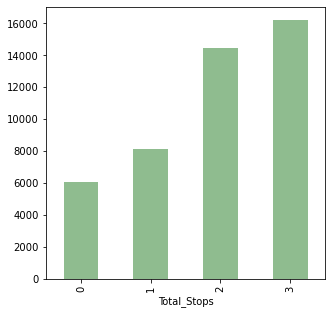

In [20]:
plt.figure(figsize=(5,5))
df.groupby("Total_Stops")['Price'].mean().plot(kind='bar',color='darkseagreen')
plt.show()

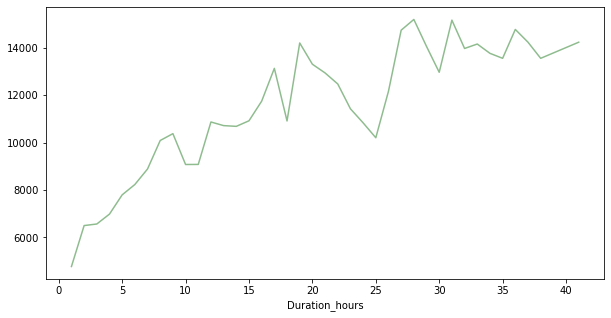

In [21]:
plt.figure(figsize=(10,5))
df.groupby("Duration_hours")['Price'].mean().plot(kind='line',color='darkseagreen')
plt.show()

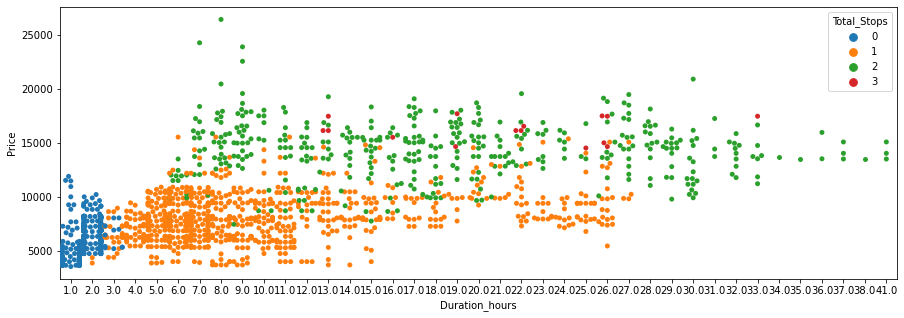

In [23]:
plt.figure(figsize=(15,5))
sns.swarmplot(df['Duration_hours'],df['Price'],hue=df['Total_Stops'])
plt.show()

<AxesSubplot:xlabel='Total_Stops', ylabel='count'>

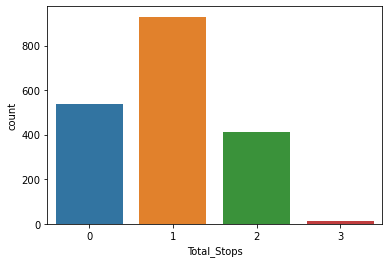

In [24]:
sns.countplot(df['Total_Stops'])

In [26]:
df.columns

Index(['AirlineName', 'Date', 'Source', 'Destination', 'DepartureTime',
       'ArrivalTime', 'Duration', 'Total_Stops', 'Price', 'Duration_hours',
       'Journey_day', 'Dep_hour', 'Arr_hour'],
      dtype='object')

# Data Cleaning

In [27]:
df.drop(columns=["Date","DepartureTime","ArrivalTime","Duration"], inplace=True)

In [28]:
df.columns

Index(['AirlineName', 'Source', 'Destination', 'Total_Stops', 'Price',
       'Duration_hours', 'Journey_day', 'Dep_hour', 'Arr_hour'],
      dtype='object')

In [29]:
categorical_var=['AirlineName', 'Source', 'Destination']
encoder=LabelEncoder()
for i in categorical_var:
    df[i]=encoder.fit_transform(df[i])

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1892 entries, 0 to 1891
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   AirlineName     1892 non-null   int64  
 1   Source          1892 non-null   int64  
 2   Destination     1892 non-null   int64  
 3   Total_Stops     1892 non-null   int64  
 4   Price           1892 non-null   int64  
 5   Duration_hours  1892 non-null   float64
 6   Journey_day     1892 non-null   int64  
 7   Dep_hour        1892 non-null   int64  
 8   Arr_hour        1892 non-null   int64  
dtypes: float64(1), int64(8)
memory usage: 133.2 KB


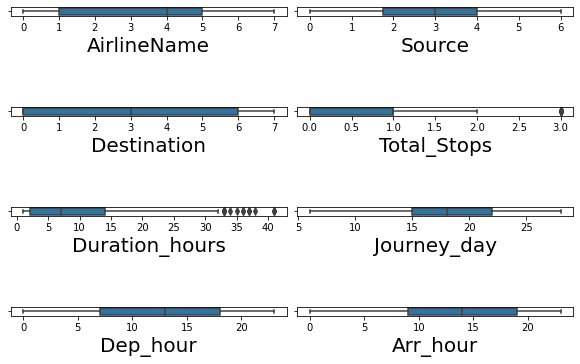

In [31]:
plt.figure(figsize=(8,5))
plotno=1
for col in df.drop("Price",axis=1):
    if plotno<=8:
        ax=plt.subplot(4,2,plotno)
        sns.boxplot(df[col],orient='v')
        plt.xlabel(col,fontsize=20)
    plotno+=1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)
plt.show()

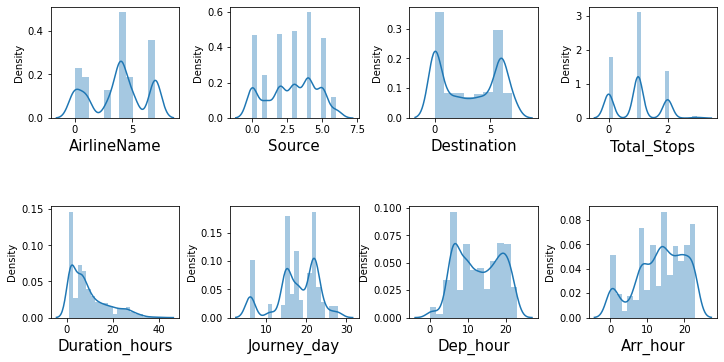

In [32]:
plt.figure(figsize=(10,5))
plotno=1
for col in df.drop("Price",axis=1):
    if plotno<=12:
        ax=plt.subplot(2,4,plotno)
        sns.distplot(df[col])
        plt.xlabel(col,fontsize=15)
    plotno+=1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)
plt.show()

In [33]:
df.skew()

AirlineName      -0.196737
Source           -0.173553
Destination       0.014322
Total_Stops       0.201335
Price             0.927690
Duration_hours    1.147638
Journey_day      -0.697395
Dep_hour         -0.003561
Arr_hour         -0.463232
dtype: float64

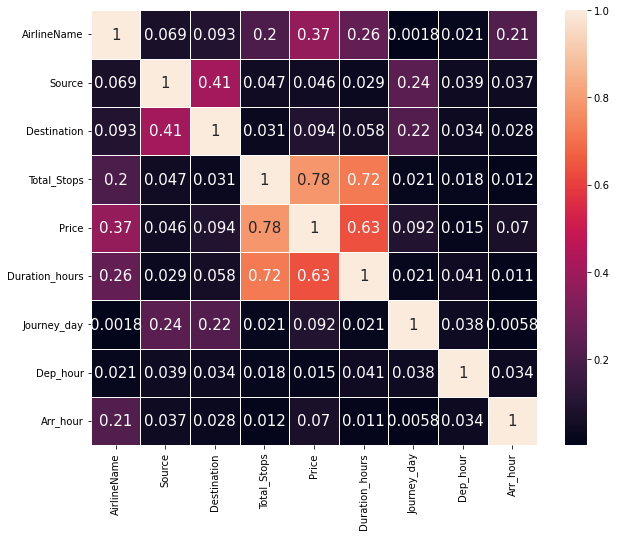

In [34]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr().abs(),annot=True,annot_kws={"size":15},linewidths=True)
plt.show()

<AxesSubplot:>

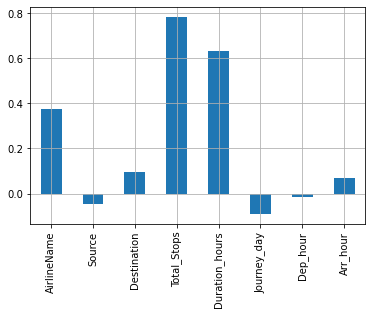

In [35]:
df.drop(['Price'],axis=1).corrwith(df.Price).plot(kind='bar',grid=True)

In [36]:
## Removing Outliers from dataset.

Zscore=zscore(df[["Duration_hours","Total_Stops"]])
abs_Zscore=np.abs(Zscore)
filtered=(abs_Zscore<3).all(axis=1)
df=df[filtered]

In [38]:
df.shape

(1882, 9)

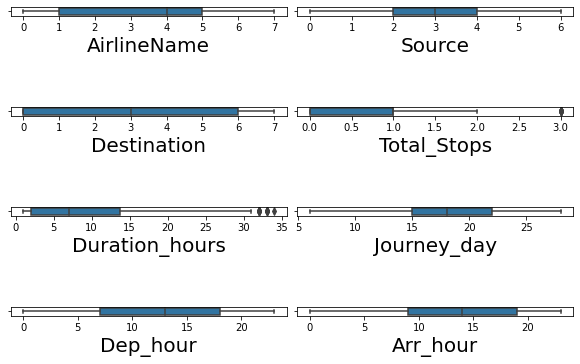

In [39]:
plt.figure(figsize=(8,5))
plotno=1
for col in df.drop("Price",axis=1):
    if plotno<=8:
        ax=plt.subplot(4,2,plotno)
        sns.boxplot(df[col],orient='v')
        plt.xlabel(col,fontsize=20)
    plotno+=1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)
plt.show()

In [40]:
df.skew()

AirlineName      -0.201470
Source           -0.176467
Destination       0.010573
Total_Stops       0.211152
Price             0.946747
Duration_hours    1.077059
Journey_day      -0.690451
Dep_hour         -0.011259
Arr_hour         -0.462625
dtype: float64

In [41]:
df.describe()

,AirlineName,Source,Destination,Total_Stops,Price,Duration_hours,Journey_day,Dep_hour,Arr_hour
count,1882.000000,1882.000000,1882.000000,1882.000000,1882.000000,1882.000000,1882.000000,1882.000000,1882.000000
mean,3.775239,2.821998,3.156217,0.943677,8944.626461,9.334219,17.654091,12.843252,13.553135
std,2.360620,1.785310,2.651680,0.726220,3729.171883,8.001155,5.497272,5.784853,6.461401
min,0.000000,0.000000,0.000000,0.000000,3601.000000,1.000000,6.000000,0.000000,0.000000
25%,1.000000,2.000000,0.000000,0.000000,6291.000000,2.000000,15.000000,7.000000,9.000000
50%,4.000000,3.000000,3.000000,1.000000,7974.000000,7.000000,18.000000,13.000000,14.000000
75%,5.000000,4.000000,6.000000,1.000000,10583.250000,13.750000,22.000000,18.000000,19.000000
max,7.000000,6.000000,7.000000,3.000000,26411.000000,34.000000,28.000000,23.000000,23.000000


In [42]:
features=['Journey_day','Duration_hours']
scalar=PowerTransformer(method='box-cox')
df[features]=scalar.fit_transform(df[features].values)
df[features].head()

,Journey_day,Duration_hours
0,-1.86774,-1.129880
1,-1.86774,-1.129880
2,-1.86774,-1.129880
3,-1.86774,-1.129880
4,-1.86774,0.653406


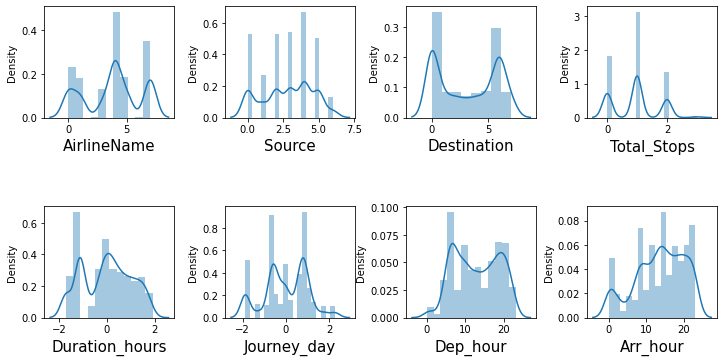

In [43]:
plt.figure(figsize=(10,5))
plotno=1
for col in df.drop("Price",axis=1):
    if plotno<=12:
        ax=plt.subplot(2,4,plotno)
        sns.distplot(df[col])
        plt.xlabel(col,fontsize=15)
    plotno+=1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)
plt.show()

In [44]:
df.skew()

AirlineName      -0.201470
Source           -0.176467
Destination       0.010573
Total_Stops       0.211152
Price             0.946747
Duration_hours   -0.047485
Journey_day      -0.190922
Dep_hour         -0.011259
Arr_hour         -0.462625
dtype: float64

In [45]:
df.shape

(1882, 9)

In [46]:
##Data loss
print(f"Data Lost:{round(((1892-1882)/10683)*100,2)}%")

Data Lost:0.09%


# Model Deployment

In [47]:
X=df.drop("Price",axis=1)
Y=df.Price

In [48]:
## Normalizing Both train &test dataset.

scalar=StandardScaler()
X_=scalar.fit_transform(X)

In [49]:
Linear=LinearRegression()
DecisionTree=DecisionTreeRegressor()
knn=KNeighborsRegressor()
RandomForest=RandomForestRegressor()
AdaBoost=AdaBoostRegressor()
Bagging=BaggingRegressor()
algo=[Linear,DecisionTree,Bagging,RandomForest,knn,AdaBoost]

In [50]:
model_acc_rs={}
maximum_acc=[]
for model in algo:
    max_accuracy=0
    for i in range(100,180,3):
        X_train,X_test,Y_train,Y_test=train_test_split(X_,Y,test_size=0.2,random_state=i)
        model.fit(X_train,Y_train)
        Y_pred=model.predict(X_test)
        accuracy=r2_score(Y_test,Y_pred)*100
        if accuracy>max_accuracy:
            max_accuracy=accuracy
            rs=i
            mae=mean_absolute_error(Y_test,Y_pred)
            mse=mean_squared_error(Y_test,Y_pred)
            rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
    maximum_acc.append(max_accuracy)
    model_acc_rs[model]=[max_accuracy,rs]
    print(f"\n\n{model}:\n---------------------------\n---------------------------\n")
    print(f"The highest accuracy is {max_accuracy} of model {model} at random state {rs}")


    print("\nMEAN ABSOLUTE ERROR:",mae)

    print(f"\nMEAN SQUARED ERROR for the model:",mse)
    
    print(f"\nROOT MEAN SQUARED ERROR for the model:",rmse)



LinearRegression():
---------------------------
---------------------------

The highest accuracy is 73.42438274479474 of model LinearRegression() at random state 157

MEAN ABSOLUTE ERROR: 1501.5124208674604

MEAN SQUARED ERROR for the model: 3745058.526399985

ROOT MEAN SQUARED ERROR for the model: 1935.2153695131674


DecisionTreeRegressor():
---------------------------
---------------------------

The highest accuracy is 91.8847996263184 of model DecisionTreeRegressor() at random state 103

MEAN ABSOLUTE ERROR: 499.7440318302387

MEAN SQUARED ERROR for the model: 1090159.7721043325

ROOT MEAN SQUARED ERROR for the model: 1044.1071650478855


BaggingRegressor():
---------------------------
---------------------------

The highest accuracy is 94.39722396739603 of model BaggingRegressor() at random state 178

MEAN ABSOLUTE ERROR: 486.8309283819629

MEAN SQUARED ERROR for the model: 702098.7648975097

ROOT MEAN SQUARED ERROR for the model: 837.9133397300163


RandomForestRegressor():


In [51]:
CVmodel={}

for model in algo:
    CVscore_={}
    print(f"\n{model}")
    print("-"*25)
    print("\n")
    for i in range(7,12):
        cvS=cross_val_score(model,X_,Y,cv=i)
        CVscore_[i]=cvS.mean()
        print(f"Mean CV Score of model {model}:: {cvS.mean()} at k-fold::{i}\n")
    CVdata=pd.DataFrame(CVscore_,index=[""])
    CVmodel[str(model)]=CVdata.max(axis=1).tolist()


LinearRegression()
-------------------------


Mean CV Score of model LinearRegression():: 0.5493906172354185 at k-fold::7

Mean CV Score of model LinearRegression():: 0.530982852744496 at k-fold::8

Mean CV Score of model LinearRegression():: 0.5446433640014062 at k-fold::9

Mean CV Score of model LinearRegression():: 0.5658113799818976 at k-fold::10

Mean CV Score of model LinearRegression():: 0.3088153589687434 at k-fold::11


DecisionTreeRegressor()
-------------------------


Mean CV Score of model DecisionTreeRegressor():: 0.6046224218978383 at k-fold::7

Mean CV Score of model DecisionTreeRegressor():: 0.576523657383222 at k-fold::8

Mean CV Score of model DecisionTreeRegressor():: 0.5961408115174329 at k-fold::9

Mean CV Score of model DecisionTreeRegressor():: 0.6319487207157339 at k-fold::10

Mean CV Score of model DecisionTreeRegressor():: 0.5494417498383425 at k-fold::11


BaggingRegressor()
-------------------------


Mean CV Score of model BaggingRegressor():: 0.70955699

In [52]:
CVmodel

{'LinearRegression()': [0.5658113799818976],
 'DecisionTreeRegressor()': [0.6319487207157339],
 'BaggingRegressor()': [0.7689379425540184],
 'RandomForestRegressor()': [0.7723715127714569],
 'KNeighborsRegressor()': [0.6294372677768507],
 'AdaBoostRegressor()': [0.6019647667989503]}

In [53]:
m=list(CVmodel.keys())

print("The least difference between the accuracy and CV score of each model is::\n")
for i in range(6):
    print(f"{m[i]}::{round(np.abs(CVmodel[m[i]][0]*100-maximum_acc[i]),2)}")

The least difference between the accuracy and CV score of each model is::

LinearRegression()::16.84
DecisionTreeRegressor()::28.69
BaggingRegressor()::17.5
RandomForestRegressor()::18.18
KNeighborsRegressor()::24.36
AdaBoostRegressor()::20.14


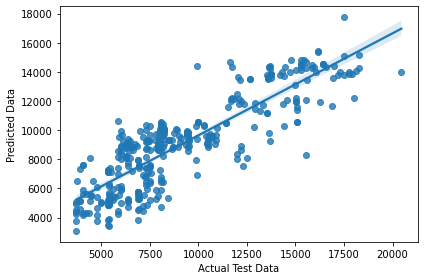

In [54]:
X_train,X_test,Y_train,Y_test=train_test_split(X_,Y,test_size=0.2,random_state=157)

#### Plotting regplot graph for Liear Regressor model
Linear.fit(X_train,Y_train)
Y_pred=Linear.predict(X_test)
sns.regplot(Y_test,Y_pred)
plt.xlabel("Actual Test Data")
plt.ylabel("Predicted Data")
plt.tight_layout()

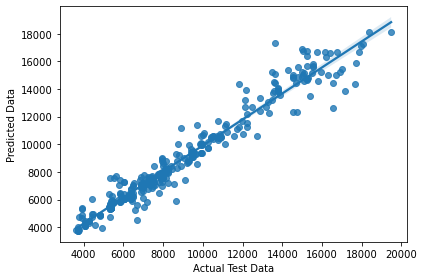

In [55]:
X_train,X_test,Y_train,Y_test=train_test_split(X_,Y,test_size=0.2,random_state=178)

#### Plotting regplot graph for RandomForestRegressor model

RandomForest.fit(X_train,Y_train)
Y_pred=RandomForest.predict(X_test)
sns.regplot(Y_test,Y_pred)
plt.xlabel("Actual Test Data")
plt.ylabel("Predicted Data")
plt.tight_layout()

# Regularization

In [56]:
lasso=Lasso()
parameters={"alpha":np.arange(0.0001,0.1,0.001),'normalize':[True,False],'max_iter':[1000,1500,2000]}
grid=GridSearchCV(lasso,parameters)
grid.fit(X_train,Y_train)
grid.best_params_

{'alpha': 0.09910000000000001, 'max_iter': 1000, 'normalize': True}

In [57]:
lasso=Lasso(alpha= 0.09910000000000001, max_iter= 1000, normalize=True)
lasso.fit(X_train,Y_train)
pred=lasso.predict(X_test)
r2_score(Y_test,pred)*100

71.0710942172212

# Hyper parameter Tuning

In [58]:
reg=RandomForestRegressor()
param={
    "n_estimators":[97,100,102],
    "min_samples_split":[2,4],
    "min_samples_leaf":[1,2,3],
    "max_depth":[21,26,28]
    
}
grd=GridSearchCV(reg,param_grid=param,cv=5)
grd.fit(X_train,Y_train)
print("Best Pramaeters:",grd.best_params_)

reg=grd.best_estimator_   #reinstantiating the best parameter to algo

reg.fit(X_train,Y_train)
ypred=reg.predict(X_test)

print(f"The accuracy is {round(r2_score(ypred,Y_test)*100,2)}% of model Random Forest.")


print("\nMEAN ABSOLUTE ERROR:",round(mean_absolute_error(ypred,Y_test),2))

print(f"\nMEAN SQUARED ERROR for the model:",round(mean_squared_error(ypred,Y_test),2))
    
print(f"\nROOT MEAN SQUARED ERROR for the model:",round(np.sqrt(mean_squared_error(ypred,Y_test)),2))

Best Pramaeters: {'max_depth': 21, 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 102}
The accuracy is 94.7% of model Random Forest.

MEAN ABSOLUTE ERROR: 477.2

MEAN SQUARED ERROR for the model: 613538.58

ROOT MEAN SQUARED ERROR for the model: 783.29


In [59]:
import pickle
pickle.dump(RandomForest,open("flightPricePrediction.pickle","wb"))